<h1><center>Navid Bahadoran</center></h1>
<h2><center>Homework2</center></h2>

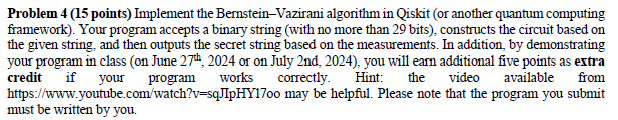

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import pandas as pd
import random

In [4]:
def bernstein_vazirani(binary_string):
    # Number of bits
    n = len(binary_string)
    
    # Create a quantum circuit with n+1 qubits and n classical bits
    qc = QuantumCircuit(n + 1, n)
    
    # Apply Hadamard gate to all qubits except the last one
    qc.h(range(n))
    
    # Apply X gate to the last qubit and then Hadamard gate
    qc.x(n)
    qc.h(n)

    # add barrier
    qc.barrier()
    
    # Oracle for the Bernstein-Vazirani algorithm
    for i, bit in enumerate(reversed(binary_string)):
        if bit == '1':
            qc.cx(i, n)
    # add barrier
    qc.barrier()
    # Apply Hadamard gate to all qubits except the last one again
    qc.h(range(n))
    #add Barrier
    qc.barrier()
    
    # Measure the first n qubits
    qc.measure(range(n),range(n))
    
    # Use the AerSimulator
    simulator = AerSimulator()
    
    # Transpile the circuit for the simulator
    compiled_circuit = transpile(qc, simulator)
    
    # Run the simulation
    result = simulator.run(compiled_circuit,shots=1).result()
    
    # Get the measurement results
    counts = result.get_counts()
    
    # Get the output string from the measurement
    output_string = list(counts.keys())[0]
    return output_string,qc

# Example usage
# secret_length=4
# secret_number=random.getrandbits(secret_length)
# secret_string=format(secret_number,'0b')
secret_string='1111111000101011000010010'
output_string,qc = bernstein_vazirani(secret_string)
print(f"Secret string: {secret_string}")
print(f"Output string: {output_string}")

Secret string: 1111111000101011000010010
Output string: 1111111000101011000010010


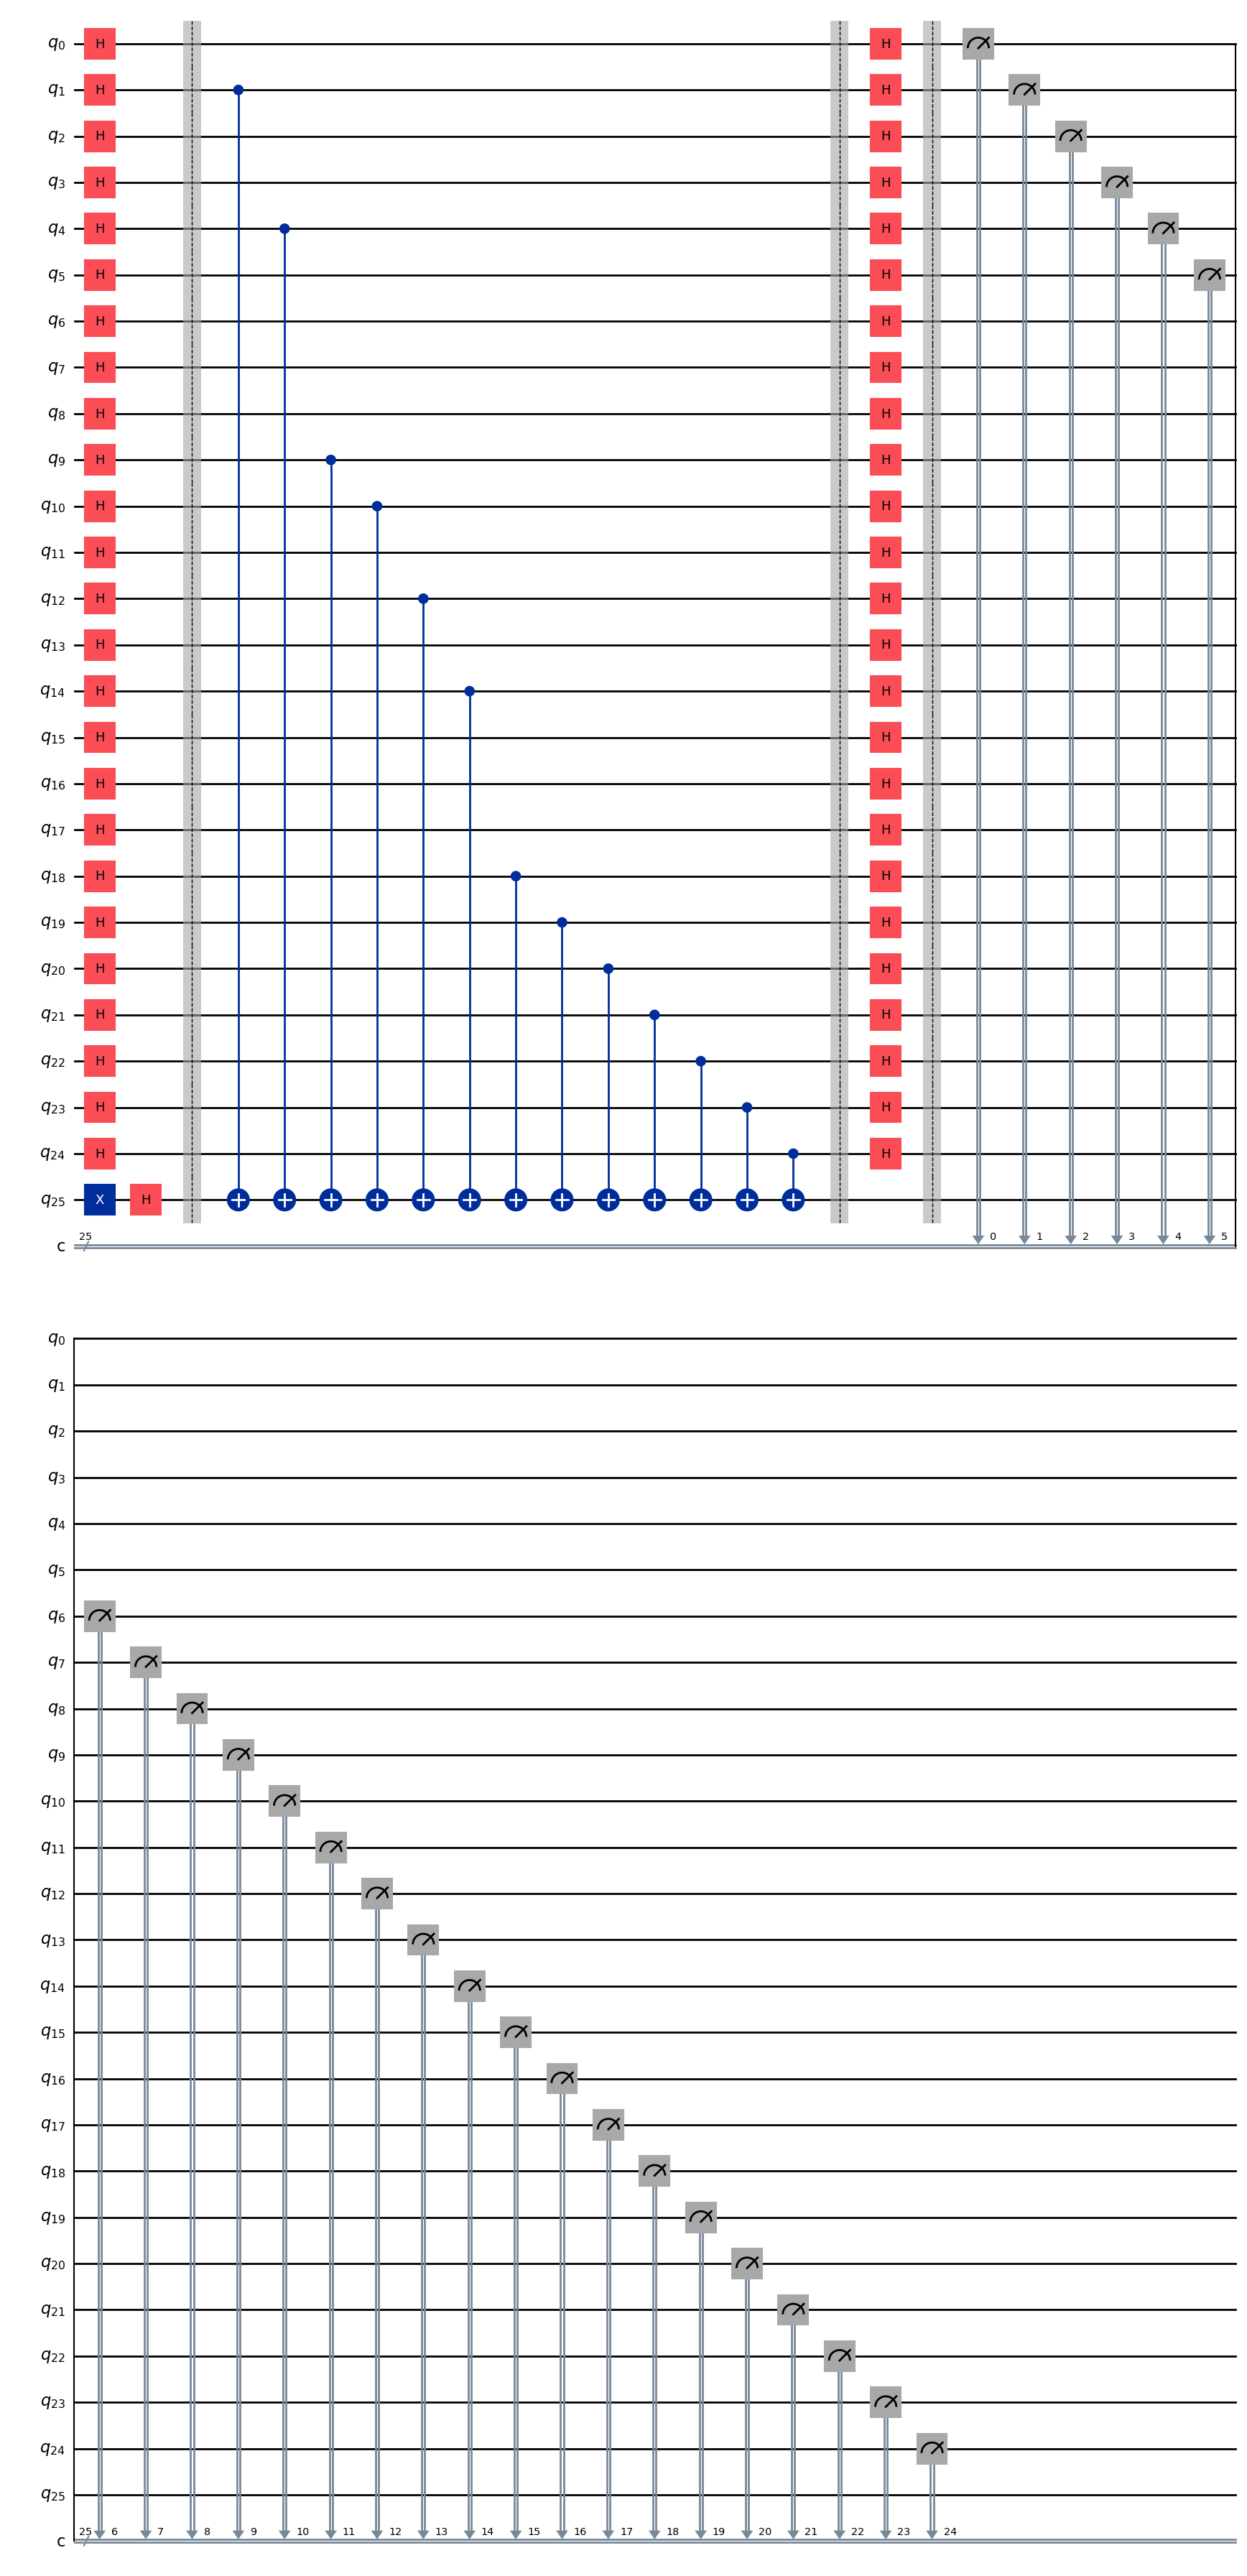

In [6]:
qc.draw(output='mpl')